Import the Libraries


In [33]:
# Import the dependencies.
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

import psycopg2 # type: ignore

import warnings
warnings.filterwarnings("ignore")


Utilized new library "psycopg2" to connect to database and fetch data. This library was not covered in the class.


In [34]:
# Establish connection to the PostgreSQL database

connection = psycopg2.connect(host='localhost', user='postgres',
                              password='ilefant99', 
                              dbname='WorldDevelopmentIndicators', port=5433)

In [35]:
# Function to fetch data from database and store in a data frame and return the data frame


def fetch_data(query):
    my_query = query

    cursor = connection.cursor()

	# execute our Query
    cursor.execute(my_query)

	# retrieve the records from the database
    records = cursor.fetchall()

    cols = []

    for elt in cursor.description:
        cols.append(elt[0])
   
    df = pd.DataFrame(data=records,columns=cols)
    return (df)



Data preparation

In [36]:
# Countries with specific country names (removing country groupings, etc.)

country = ("SELECT * FROM country where countrycode NOT IN ('ZAF','CEB','EAS','EAP','ECS','ECA','EUU','FCS','HPC','HIC','NOC','OEC','LNC','MEA','MNA','MIC','NAC','OED','OSS','SST','SAS','SSF','SSA','UMC','CSS','LMY','LIC','LMC','ARB','WLD','FCS');")

country_df = fetch_data(country)
country_df

,countrycode,shortname,tablename,longname,alpha2code,currencyunit,specialnotes,region,incomegroup,wb2code,nationalaccountsbaseyear,nationalaccountsreferenceyear,snapricevaluation,lendingcategory,othergroups,systemofnationalaccounts,alternativeconversionfactor,pppsurveyyear,balanceofpaymentsmanualinuse,externaldebtreportingstatus,systemoftrade,governmentaccountingconcept,imfdatadisseminationstandard,latestpopulationcensus,latesthouseholdsurvey,sourceofmostrecentincomeandexpendituredata,vitalregistrationcomplete,latestagriculturalcensus,latestindustrialdata,latesttradedata,latestwaterwithdrawaldata
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,None,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,None,None,None,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",None,2013/14,None,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,None,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996,Value added at basic prices (VAB),IBRD,None,Country uses the 1993 System of National Accou...,None,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,None,Middle East & North Africa,Upper middle income,DZ,1980,None,Value added at basic prices (VAB),IBRD,None,Country uses the 1968 System of National Accou...,None,2011,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",None,None,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,None,East Asia & Pacific,Upper middle income,AS,None,None,None,None,None,Country uses the 1968 System of National Accou...,None,2011 (household consumption only).,None,None,Special trade system,None,None,2010,None,None,Yes,2007,None,None,None
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,None,Europe & Central Asia,High income: nonOECD,AD,2000,None,Value added at basic prices (VAB),None,None,Country uses the 1968 System of National Accou...,None,None,None,None,Special trade system,None,None,2011. Population data compiled from administra...,None,None,Yes,None,None,2006.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,VIR,Virgin Islands,Virgin Islands (U.S.),Virgin Islands of the United States,VI,U.S. dollar,None,Latin America & Caribbean,High income: nonOECD,VI,1982,None,None,None,None,Country uses the 1968 System of National Accou...,None,None,None,None,General trade system,None,None,2010,None,None,Yes,2007,None,None,None
214,WBG,West Bank and Gaza,West Bank and Gaza,West Bank and Gaza,PS,Israeli new shekel,The new base year is 2004.,Middle East & North Africa,Lower middle income,GZ,2004,None,Value added at basic prices (VAB),None,None,Country uses the 1968 System of National Accou...,None,2011,"IMF Balance of Payments Manual, 6th edition.",None,Special trade system,Budgetary central government,Special Data Dissemination Standard (SDDS),2007,"Multiple Indicator Cluster Survey (MICS), 2014","Integrated household survey (IHS), 2011",None,None,2010.0,None,2005.0
215,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,2007,None,Value

In [37]:
# Indicators data frame filtered with the specific countries
indi = ("SELECT * FROM indicators where countrycode NOT IN ('ZAF','CEB','EAS','EAP','ECS','ECA','EUU','FCS','HPC','HIC','NOC','OEC','LNC','MEA','MNA','MIC','NAC','OED','OSS','SST','SAS','SSF','SSA','UMC','CSS','LMY','LIC','LMC','ARB','WLD','FCS');")

indicators_df = fetch_data(indi)
indicators_df.head()

,countryname,countrycode,indicatorname,indicatorcode,year,value
0,Seychelles,SYC,External balance on goods and services (curren...,NE.RSB.GNFS.CD,2012,-188805735.551664
1,Seychelles,SYC,External resources for health (% of total expe...,SH.XPD.EXTR.ZS,2012,7.87794818
2,Seychelles,SYC,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,2012,2.4
3,Seychelles,SYC,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,2012,1450.0
4,Seychelles,SYC,Final consumption expenditure (current LCU),NE.CON.TOTL.CN,2012,12321000000.0


In [38]:
# Series data frame
ss = ("SELECT * FROM series;")

series_df = fetch_data(ss)
series_df.head()

,seriescode,topic,indicatorname,shortdefinition,longdefinition,unitofmeasure,periodicity,baseperiod,othernotes,aggregationmethod,limitationsandexceptions,notesfromoriginalsource,generalcomments,source,statisticalconceptandmethodology,developmentrelevance,relatedsourcelinks,otherweblinks,relatedindicators,licensetype
0,BN.KLT.DINV.CD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net (BoP, current US$)",None,Foreign direct investment are the net inflows ...,None,Annual,None,None,None,None,None,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",None,None,None,None,None,Open
1,BX.KLT.DINV.WD.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (% of GDP)",None,Foreign direct investment are the net inflows ...,None,Annual,None,None,Weighted average,FDI data do not give a complete picture of int...,None,Note: Data starting from 2005 are based on the...,"International Monetary Fund, International Fin...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,None,None,None,Open
2,BX.KLT.DINV.CD.WD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (BoP, c...",None,Foreign direct investment refers to direct inv...,None,Annual,None,None,Sum,FDI data do not give a complete picture of int...,None,Note: Data starting from 2005 are based on the...,"International Monetary Fund, Balance of Paymen...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,None,None,None,Open
3,BM.KLT.DINV.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net outflows (% of ...",None,Foreign direct investment are the net inflows ...,None,Annual,None,None,Weighted average,None,None,Note: Data are based on the sixth edition of t...,"International Monetary Fund, International Fin...",None,None,None,None,None,Open
4,BN.TRF.KOGT.CD,Economic Policy & Debt: Balance of payments: C...,"Net capital account (BoP, current US$)",None,Net capital account records acquisitions and d...,None,Annual,None,None,None,None,None,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",None,None,None,None,None,Open


In [39]:
# Merge country and indicators data frames
country_indicator_df = pd.merge(country_df,indicators_df, on='countrycode')
pd.set_option('display.max_columns', None)
country_indicator_df.head()

,countrycode,shortname,tablename,longname,alpha2code,currencyunit,specialnotes,region,incomegroup,wb2code,nationalaccountsbaseyear,nationalaccountsreferenceyear,snapricevaluation,lendingcategory,othergroups,systemofnationalaccounts,alternativeconversionfactor,pppsurveyyear,balanceofpaymentsmanualinuse,externaldebtreportingstatus,systemoftrade,governmentaccountingconcept,imfdatadisseminationstandard,latestpopulationcensus,latesthouseholdsurvey,sourceofmostrecentincomeandexpendituredata,vitalregistrationcomplete,latestagriculturalcensus,latestindustrialdata,latesttradedata,latestwaterwithdrawaldata,countryname,indicatorname,indicatorcode,year,value
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,None,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,None,None,None,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",None,2013/14,None,2013.0,2000.0,Afghanistan,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,2013,18346129155.1037
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,None,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,None,None,None,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",None,2013/14,None,2013.0,2000.0,Afghanistan,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,2013,597.934625767252
2,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,None,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,None,None,None,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",None,2013/14,None,2013.0,2000.0,Afghanistan,"Adjusted net savings, excluding particulate em...",NY.ADJ.SVNX.GN.ZS,2013,-30.4790126332721
3,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,None,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,None,None,None,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",None,2013/14,None,2013.0,2000.0,Afghanistan,"Adjusted net savings, excluding particulate em...",NY.ADJ.SVNX.CD,2013,-6216188547.76412
4,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,None,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,None,None,None,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",None,2013/14,None,2013.0,2000.0,Afghanistan,"Adjusted net savings, including particulate em...",NY.ADJ.SVNG.GN.ZS,2013,-36.848065071090495


In [40]:
# Country and indicators merged data frame with only the columns needed
country_indicator_df_final = country_indicator_df[['countrycode','countryname','region','incomegroup','indicatorname','indicatorcode','year','value']]
country_indicator_df_final.head()

,countrycode,countryname,region,incomegroup,indicatorname,indicatorcode,year,value
0,AFG,Afghanistan,South Asia,Low income,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,2013,18346129155.1037
1,AFG,Afghanistan,South Asia,Low income,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,2013,597.934625767252
2,AFG,Afghanistan,South Asia,Low income,"Adjusted net savings, excluding particulate em...",NY.ADJ.SVNX.GN.ZS,2013,-30.4790126332721
3,AFG,Afghanistan,South Asia,Low income,"Adjusted net savings, excluding particulate em...",NY.ADJ.SVNX.CD,2013,-6216188547.76412
4,AFG,Afghanistan,South Asia,Low income,"Adjusted net savings, including particulate em...",NY.ADJ.SVNG.GN.ZS,2013,-36.848065071090495


In [41]:
# country, indicators and series data frames merging
country_indicators_series_df = pd.merge(country_indicator_df_final, series_df, on='indicatorname')
country_indicators_series_df.head()

,countrycode,countryname,region,incomegroup,indicatorname,indicatorcode,year,value,seriescode,topic,shortdefinition,longdefinition,unitofmeasure,periodicity,baseperiod,othernotes,aggregationmethod,limitationsandexceptions,notesfromoriginalsource,generalcomments,source,statisticalconceptandmethodology,developmentrelevance,relatedsourcelinks,otherweblinks,relatedindicators,licensetype
0,AFG,Afghanistan,South Asia,Low income,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,2013,18346129155.1037,NY.ADJ.NNTY.CD,Economic Policy & Debt: National accounts: Adj...,None,Adjusted net national income is GNI minus cons...,None,Annual,None,None,Gap-filled total,Adjusted net national income differs from the ...,None,None,World Bank staff estimates based on sources an...,Adjusted net national income complements gross...,Adjusted net national income is particularly u...,None,None,None,Open
1,AFG,Afghanistan,South Asia,Low income,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,1970,1662024506.7157,NY.ADJ.NNTY.CD,Economic Policy & Debt: National accounts: Adj...,None,Adjusted net national income is GNI minus cons...,None,Annual,None,None,Gap-filled total,Adjusted net national income differs from the ...,None,None,World Bank staff estimates based on sources an...,Adjusted net national income complements gross...,Adjusted net national income is particularly u...,None,None,None,Open
2,AFG,Afghanistan,South Asia,Low income,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,1971,1736488783.41076,NY.ADJ.NNTY.CD,Economic Policy & Debt: National accounts: Adj...,None,Adjusted net national income is GNI minus cons...,None,Annual,None,None,Gap-filled total,Adjusted net national income differs from the ...,None,None,World Bank staff estimates based on sources an...,Adjusted net national income complements gross...,Adjusted net national income is particularly u...,None,None,None,Open
3,AFG,Afghanistan,South Asia,Low income,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,1972,1513806234.61444,NY.ADJ.NNTY.CD,Economic Policy & Debt: National accounts: Adj...,None,Adjusted net national income is GNI minus cons...,None,Annual,None,None,Gap-filled total,Adjusted net national income differs from the ...,None,None,World Bank staff estimates based on sources an...,Adjusted net national income complements gross...,Adjusted net national income is particularly u...,None,None,None,Open
4,AFG,Afghanistan,South Asia,Low income,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,1973,1611939969.16855,NY.ADJ.NNTY.CD,Economic Policy & Debt: National accounts: Adj...,None,Adjusted net national income is GNI minus cons...,None,Annual,None,None,Gap-filled total,Adjusted net national income differs from the ...,None,None,World Bank staff estimates based on sources an...,Adjusted net national income complements gross...,Adjusted net national income is particularly u...,None,None,None,Open


In [42]:
# Final data frame merged with country, indicators and series data frames and with only needed columns
country_indicators_series_df_final = country_indicators_series_df[['countrycode','countryname','region','incomegroup','indicatorname','indicatorcode','year','value','seriescode','topic','unitofmeasure','aggregationmethod','source','statisticalconceptandmethodology','developmentrelevance']]
country_indicators_series_df_final.head()

,countrycode,countryname,region,incomegroup,indicatorname,indicatorcode,year,value,seriescode,topic,unitofmeasure,aggregationmethod,source,statisticalconceptandmethodology,developmentrelevance
0,AFG,Afghanistan,South Asia,Low income,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,2013,18346129155.1037,NY.ADJ.NNTY.CD,Economic Policy & Debt: National accounts: Adj...,None,Gap-filled total,World Bank staff estimates based on sources an...,Adjusted net national income complements gross...,Adjusted net national income is particularly u...
1,AFG,Afghanistan,South Asia,Low income,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,1970,1662024506.7157,NY.ADJ.NNTY.CD,Economic Policy & Debt: National accounts: Adj...,None,Gap-filled total,World Bank staff estimates based on sources an...,Adjusted net national income complements gross...,Adjusted net national income is particularly u...
2,AFG,Afghanistan,South Asia,Low income,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,1971,1736488783.41076,NY.ADJ.NNTY.CD,Economic Policy & Debt: National accounts: Adj...,None,Gap-filled total,World Bank staff estimates based on sources an...,Adjusted net national income complements gross...,Adjusted net national income is particularly u...
3,AFG,Afghanistan,South Asia,Low income,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,1972,1513806234.61444,NY.ADJ.NNTY.CD,Economic Policy & Debt: National accounts: Adj...,None,Gap-filled total,World Bank staff estimates based on sources an...,Adjusted net national income complements gross...,Adjusted net national income is particularly u...
4,AFG,Afghanistan,South Asia,Low income,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,1973,1611939969.16855,NY.ADJ.NNTY.CD,Economic Policy & Debt: National accounts: Adj...,None,Gap-filled total,World Bank staff estimates based on sources an...,Adjusted net national income complements gross...,Adjusted net national income is particularly u...


Data Analysis

In [43]:
# Top 10 Countries for GDP per capita (current US$)

Top10_GDP_2011 = country_indicators_series_df_final[(country_indicators_series_df_final['indicatorname']=='GDP per capita (current US$)') & (country_indicators_series_df_final['year']==2011)
].groupby('countryname')['value'].sum().reset_index(name='GDP per capita (current US$)').sort_values(by='GDP per capita (current US$)',ascending=False).head(10)

Top10_GDP_2011.round(0)

,countryname,GDP per capita (current US$)
123,Monaco,163351.64668556198
106,Liechtenstein,157092.969386695
108,Luxembourg,113239.56097199
135,Norway,100575.117263444
148,Qatar,89115.9014908449
173,Switzerland,88002.6095703805
20,Bermuda,85973.158416455
109,"Macao SAR, China",67012.96342940269
9,Australia,62216.5471294133
48,Denmark,61304.0612046553


In [44]:
Top10_GDP_2011 = country_indicators_series_df_final[(country_indicators_series_df_final['indicatorname']=='GDP per capita (current US$)')
].groupby('countryname')['value'].sum().reset_index(name='GDP per capita (current US$)').sort_values(by='GDP per capita (current US$)',ascending=False).head(10)

Top10_GDP_2011.round(0)

,countryname,GDP per capita (current US$)
128,Monaco,3249417.641723975765
111,Liechtenstein,2510601.140306848456
113,Luxembourg,2080989.2791216630932
20,Bermuda,1740884.5765036159235
142,Norway,1723747.6935068805544
182,Switzerland,1609664.6215422410172
155,Qatar,1453395.0931505789284
197,United Arab Emirates,1333144.213507626696
50,Denmark,1325447.6663314314751
181,Sweden,1287011.3538859305062


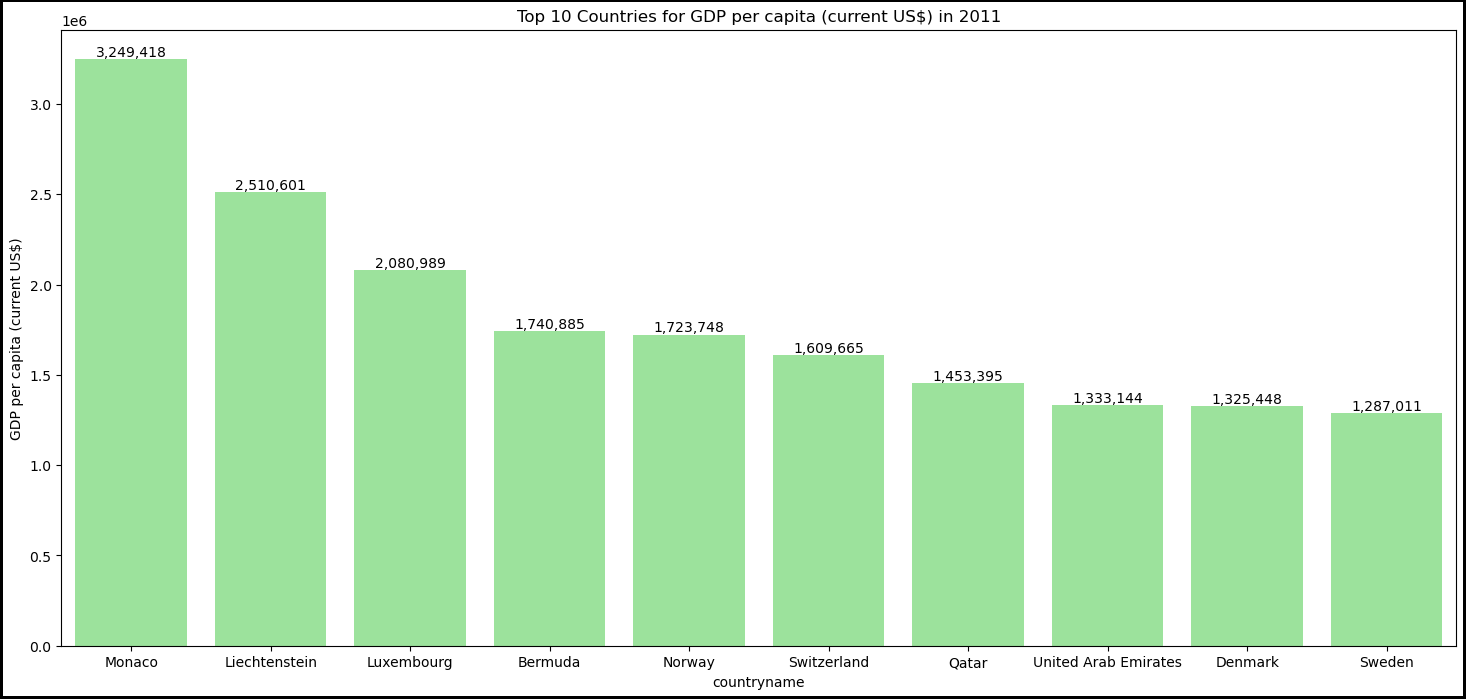

In [45]:
# Plotting Top 10 countries GDP per capita (current US$) in 2011
plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)
plt.title("Top 10 Countries for GDP per capita (current US$) in 2011")
ax = sns.barplot(x='countryname', y="GDP per capita (current US$)", data=Top10_GDP_2011, color='lightgreen', order=Top10_GDP_2011.sort_values('GDP per capita (current US$)',ascending=False).countryname)

for i in ax.containers:
    ax.bar_label(i, labels=[f'{x:,.0f}' for x in i.datavalues])

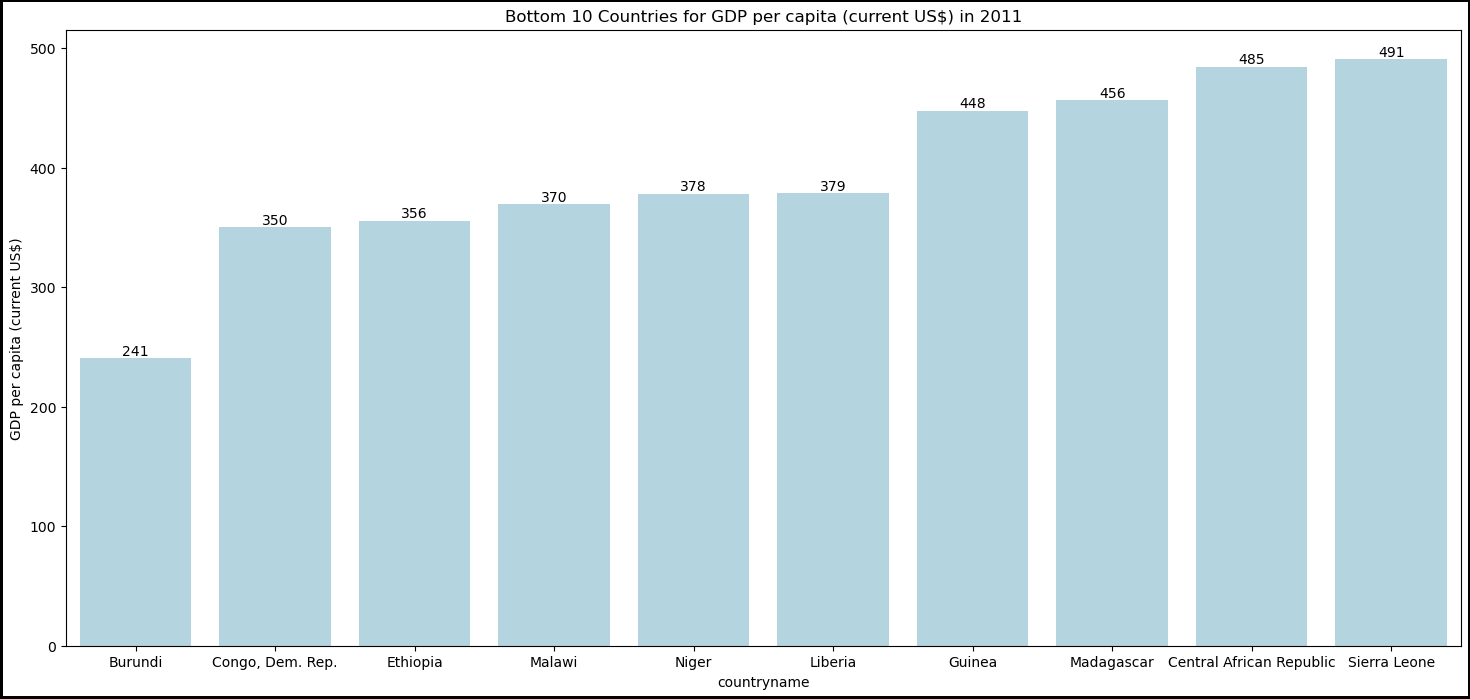

In [46]:

# Bottom 10 countries GDP in 2011

Bottom10_GDP_2011_Bottom_10 = country_indicators_series_df_final[(country_indicators_series_df_final['indicatorname']=='GDP per capita (current US$)') & (country_indicators_series_df_final['year']==2011)
].groupby('countryname')['value'].sum().reset_index(name='GDP per capita (current US$)').sort_values(by='GDP per capita (current US$)').head(10)

# Bottom10_GDP_2011.round(0)

# Plotting Top 10 countries GDP in 2011
plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)
plt.title("Bottom 10 Countries for GDP per capita (current US$) in 2011")
ax = sns.barplot(x='countryname', y="GDP per capita (current US$)", data=Bottom10_GDP_2011_Bottom_10, color='lightblue', order=Bottom10_GDP_2011_Bottom_10.sort_values('GDP per capita (current US$)').countryname)

for i in ax.containers:
    ax.bar_label(i, labels=[f'{x:,.0f}' for x in i.datavalues])

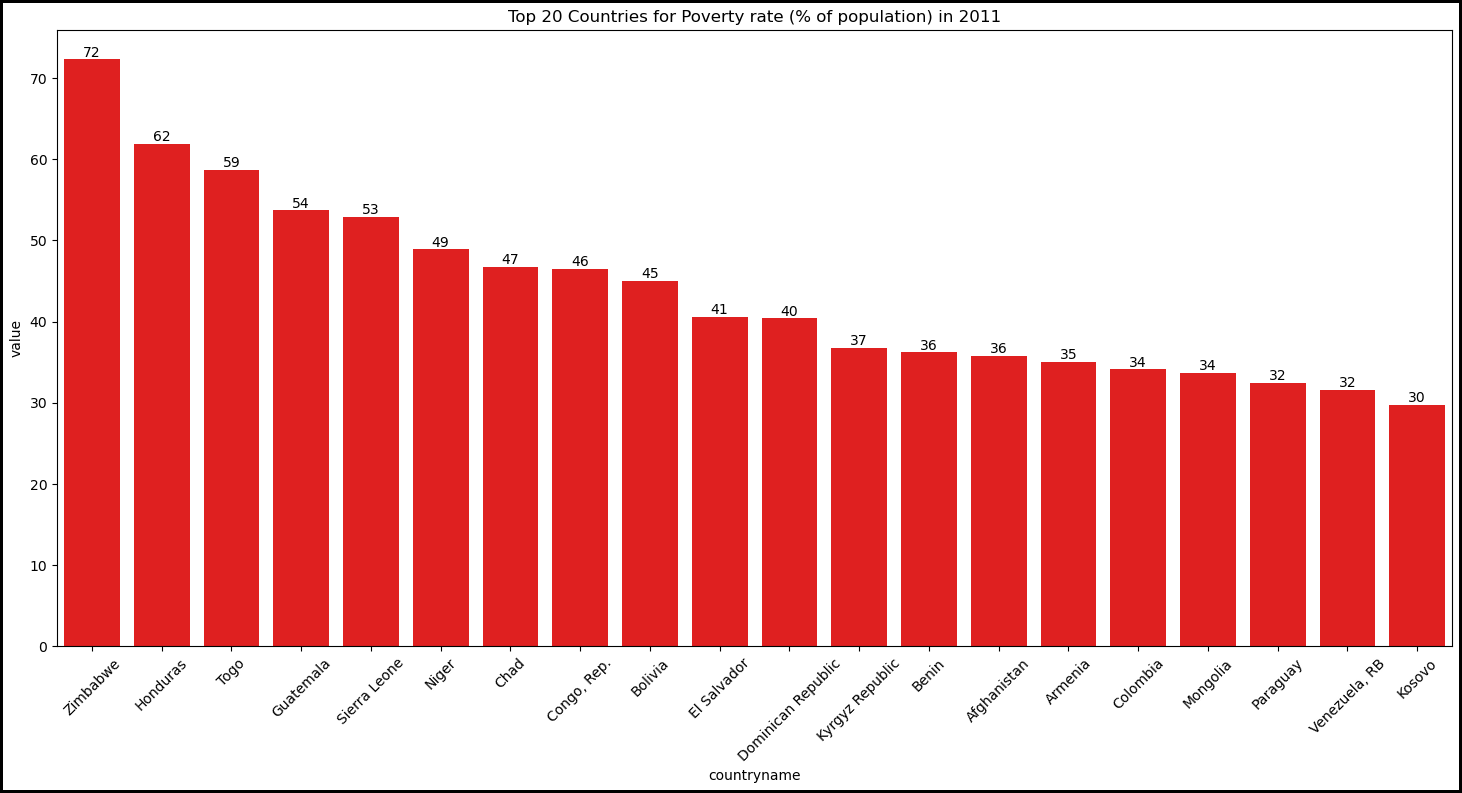

In [47]:
# Top 20 countries for Poverty Rate (Poverty headcount ratio at national poverty lines (% of population))

Poverty_2011_Top10 = country_indicators_series_df_final[(country_indicators_series_df_final['indicatorcode']=='SI.POV.NAHC') & (country_indicators_series_df_final['year']==2011)
].groupby('countryname')['value'].sum().reset_index().sort_values(by='value',ascending=False).head(20)

Poverty_2011_Top10.round(0)

plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)
plt.title("Top 20 Countries for Poverty rate (% of population) in 2011")
ax = sns.barplot(x='countryname', y="value", data=Poverty_2011_Top10, color='red', order=Poverty_2011_Top10.sort_values('value',ascending=False).countryname)
plt.xticks(rotation=45) 


for i in ax.containers:
    ax.bar_label(i, labels=[f'{x:,.0f}' for x in i.datavalues])

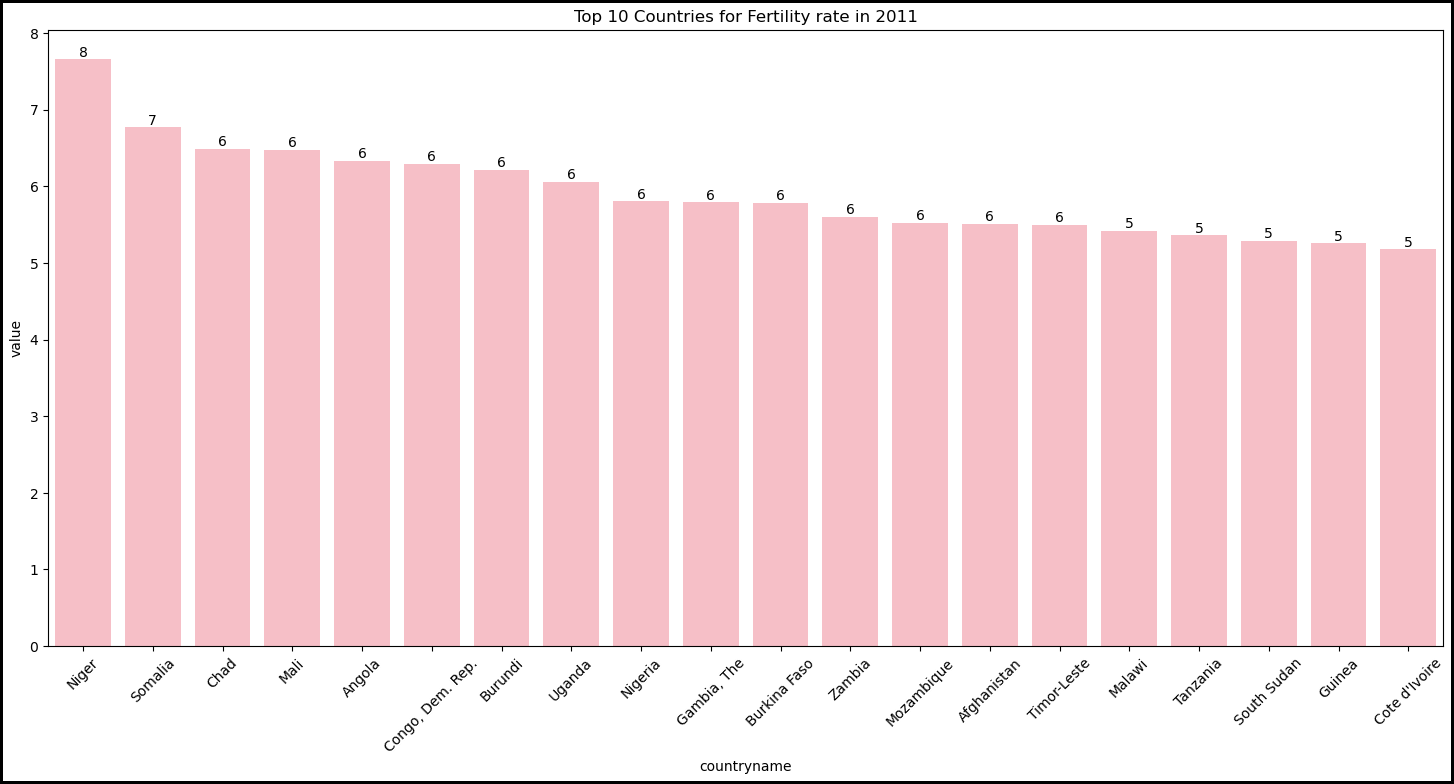

In [48]:
# Top 20 countries with high Fertility Rates (Fertility rate, total (births per woman))

Fertility_2011_Top_10 = country_indicators_series_df_final[(country_indicators_series_df_final['indicatorcode']=='SP.DYN.TFRT.IN') & (country_indicators_series_df_final['year']==2011)
].groupby('countryname')['value'].sum().reset_index().sort_values(by='value',ascending=False).head(20)

Fertility_2011_Top_10.round(0)

plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)
plt.title("Top 10 Countries for Fertility rate in 2011")
ax = sns.barplot(x='countryname', y="value", data=Fertility_2011_Top_10, color='lightpink', order=Fertility_2011_Top_10.sort_values('value',ascending=False).countryname)
plt.xticks(rotation=45) 


for i in ax.containers:
    ax.bar_label(i, labels=[f'{x:,.0f}' for x in i.datavalues])

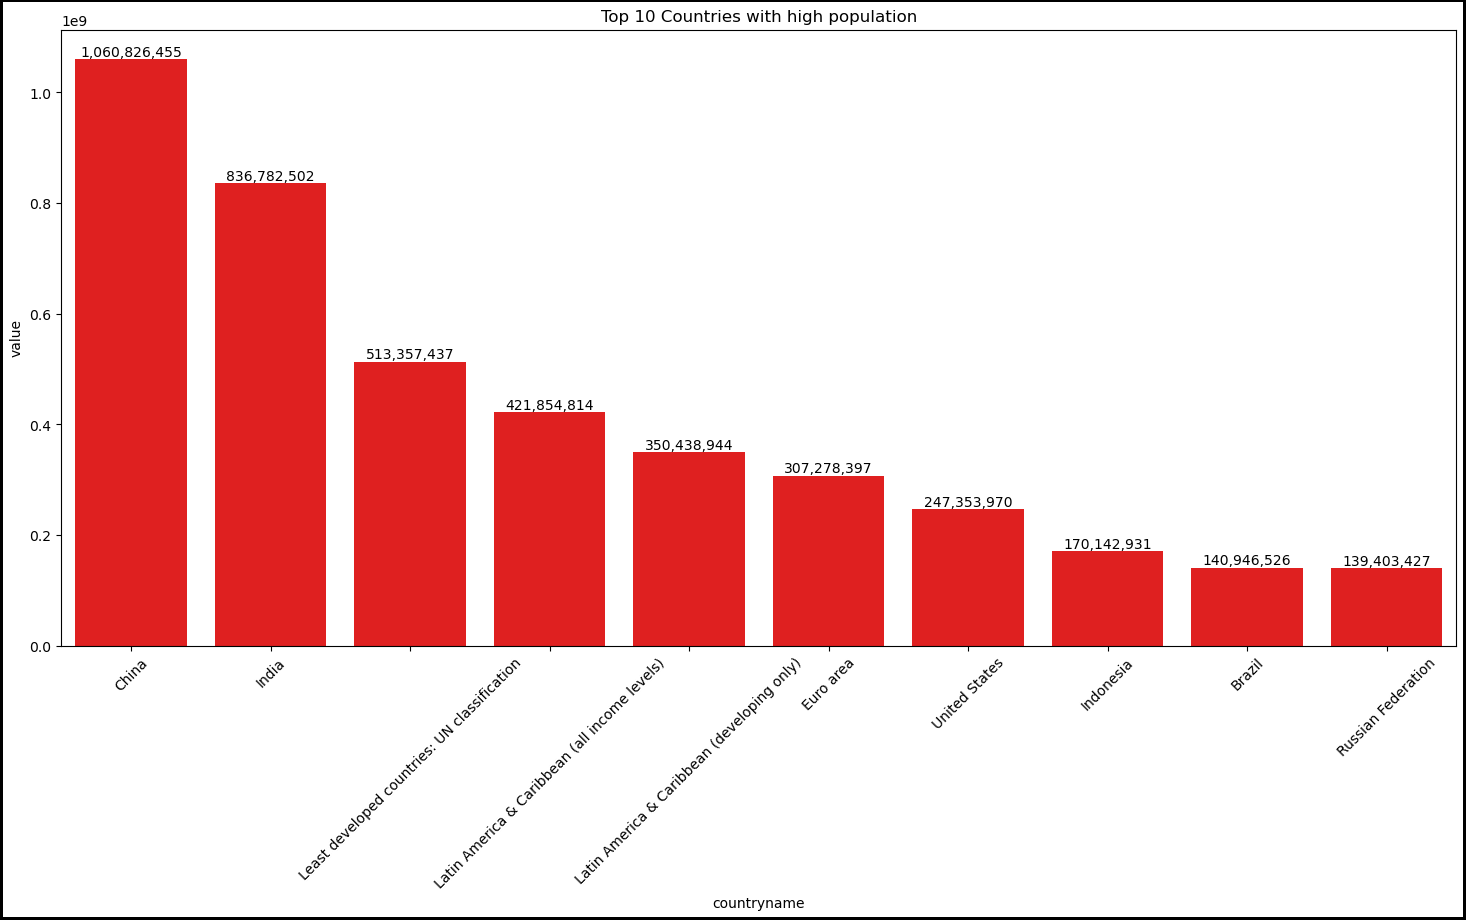

In [49]:
# Most populated countries (Population, total)

Population_Top_10 = country_indicators_series_df_final[country_indicators_series_df_final['indicatorcode']=='SP.POP.TOTL'
].groupby('countryname')['value'].mean().reset_index().sort_values(by='value',ascending=False).head(10)

Population_Top_10.round(0)

plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)
plt.title("Top 10 Countries with high population")
ax = sns.barplot(x='countryname', y="value", data=Population_Top_10, color='red', order=Population_Top_10.sort_values('value',ascending=False).countryname)
plt.xticks(rotation=45) 


for i in ax.containers:
    ax.bar_label(i, labels=[f'{x:,.0f}' for x in i.datavalues])


# Adult literacy rate, population 15+ years, both sexes (%)

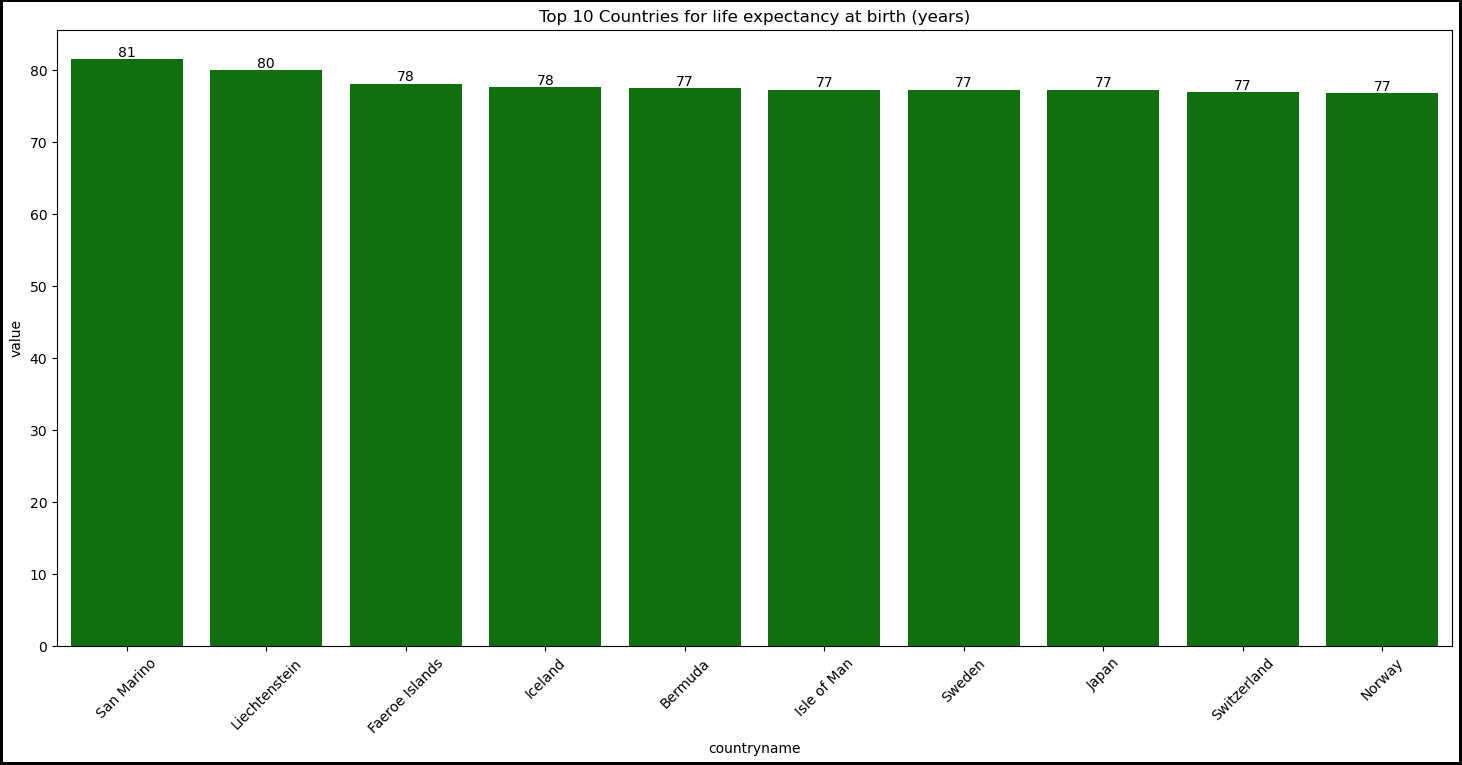

In [50]:
# Top 10 countries for Life Expectancy at Birth (Life expectancy at birth, total (years))

Life_Expectancy_at_Birth_Top_10 = country_indicators_series_df_final[country_indicators_series_df_final['indicatorcode']=='SP.DYN.LE00.IN'
].groupby('countryname')['value'].mean().reset_index().sort_values(by='value',ascending=False).head(10)

Life_Expectancy_at_Birth_Top_10.round(0)

plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)
plt.title("Top 10 Countries for life expectancy at birth (years)")
ax = sns.barplot(x='countryname', y="value", data=Life_Expectancy_at_Birth_Top_10, color='green', order=Life_Expectancy_at_Birth_Top_10.sort_values('value',ascending=False).countryname)
plt.xticks(rotation=45) 


for i in ax.containers:
    ax.bar_label(i, labels=[f'{x:,.0f}' for x in i.datavalues])

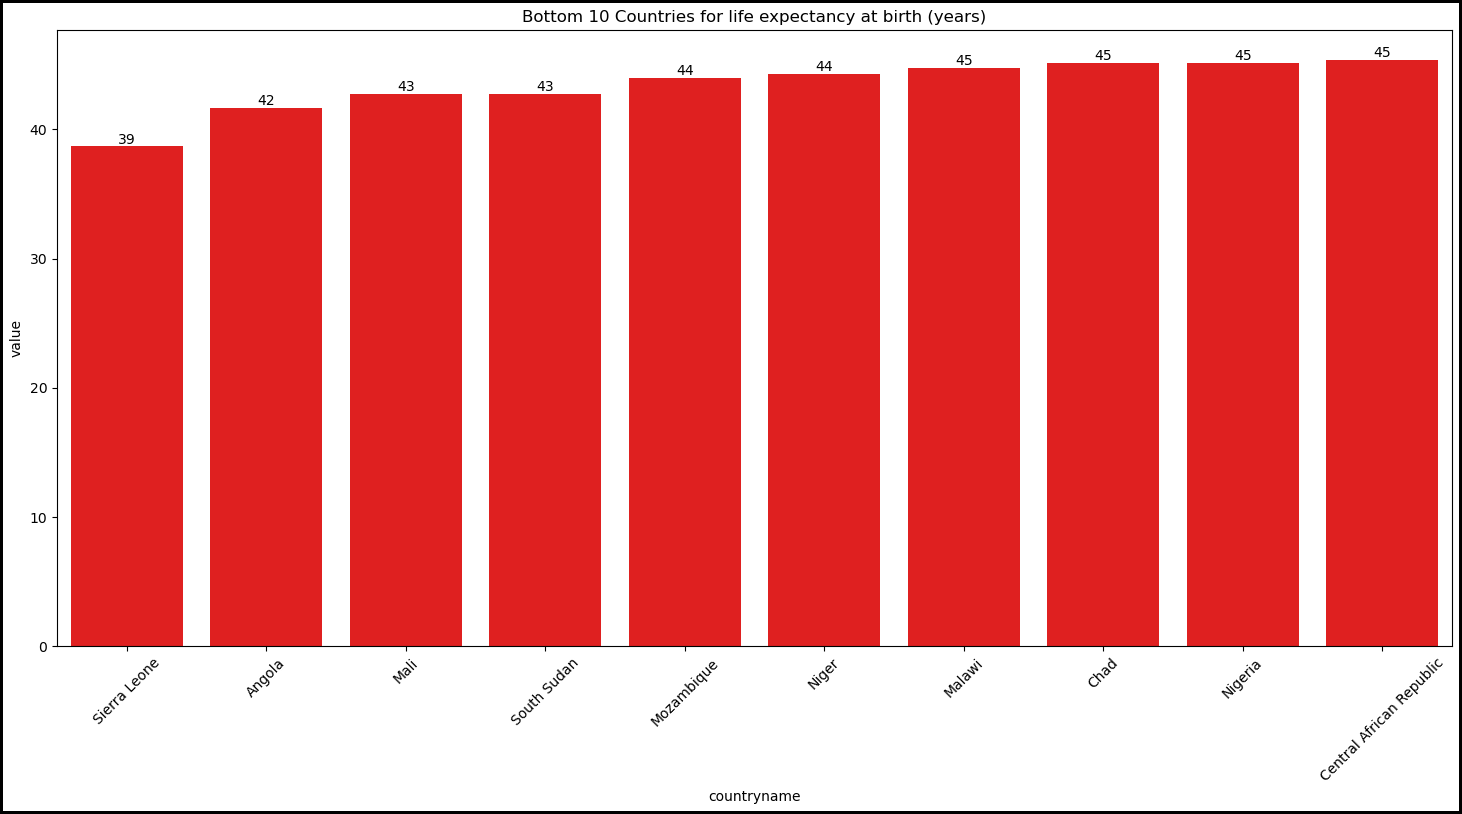

In [51]:
# Bottom 10 countries for Life Expectancy at Birth

Life_Expectancy_at_Birth_Bottom_10 = country_indicators_series_df_final[country_indicators_series_df_final['indicatorcode']=='SP.DYN.LE00.IN'
].groupby('countryname')['value'].mean().reset_index().sort_values(by='value').head(10)

Life_Expectancy_at_Birth_Bottom_10.round(0)

plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)
plt.title("Bottom 10 Countries for life expectancy at birth (years)")
ax = sns.barplot(x='countryname', y="value", data=Life_Expectancy_at_Birth_Bottom_10, color='red', order=Life_Expectancy_at_Birth_Bottom_10.sort_values('value').countryname)
plt.xticks(rotation=45) 


for i in ax.containers:
    ax.bar_label(i, labels=[f'{x:,.0f}' for x in i.datavalues])

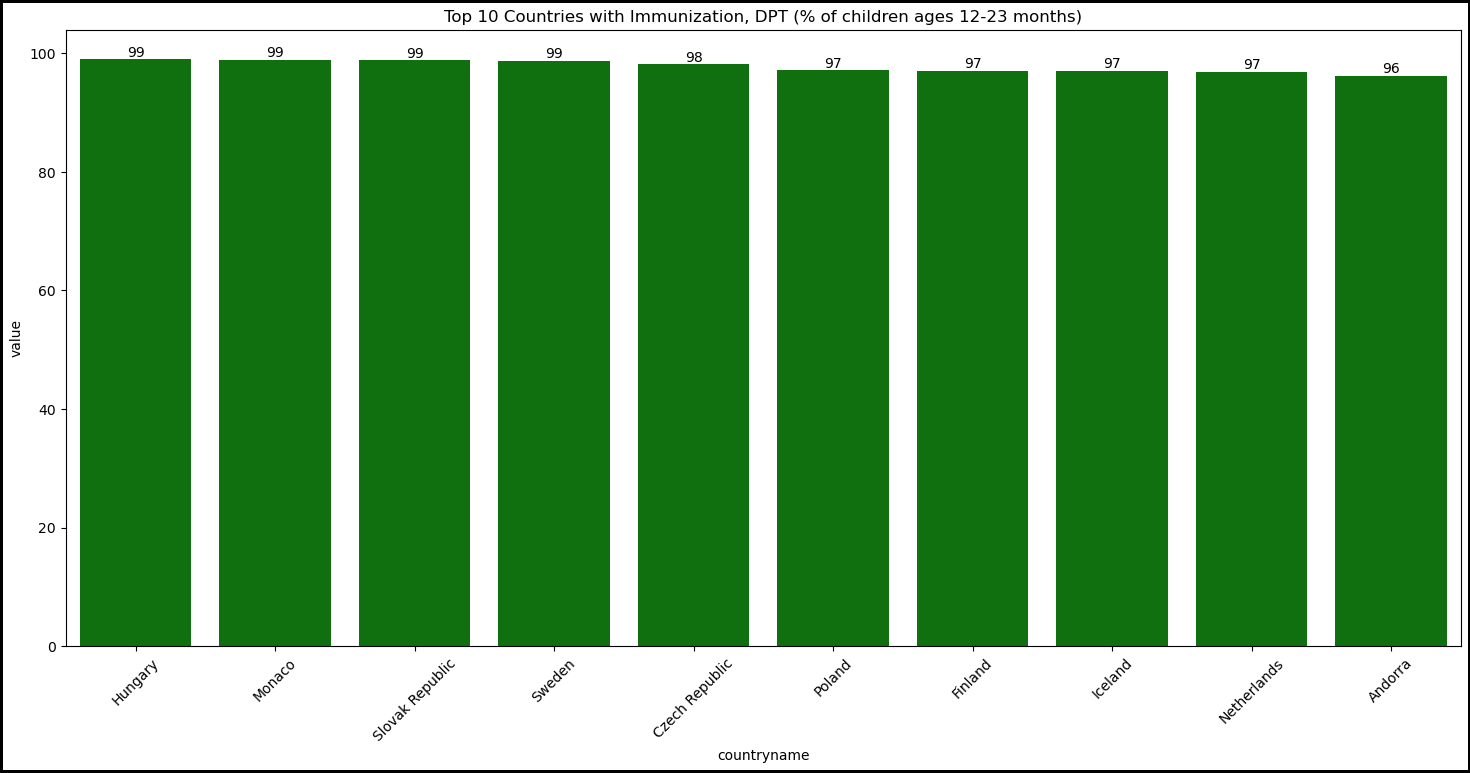

In [52]:
# Top 10 countries for Immunization (Immunization, DPT (% of children ages 12-23 months))

Immunization_DPT_Top_10 = country_indicators_series_df_final[country_indicators_series_df_final['indicatorcode']=='SH.IMM.IDPT'
].groupby('countryname')['value'].mean().reset_index().sort_values(by='value',ascending=False).head(10)

Immunization_DPT_Top_10.round(0)

plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)
plt.title("Top 10 Countries with Immunization, DPT (% of children ages 12-23 months)")
ax = sns.barplot(x='countryname', y="value", data=Immunization_DPT_Top_10, color='green', order=Immunization_DPT_Top_10.sort_values('value',ascending=False).countryname)
plt.xticks(rotation=45) 


for i in ax.containers:
    ax.bar_label(i, labels=[f'{x:,.0f}' for x in i.datavalues])

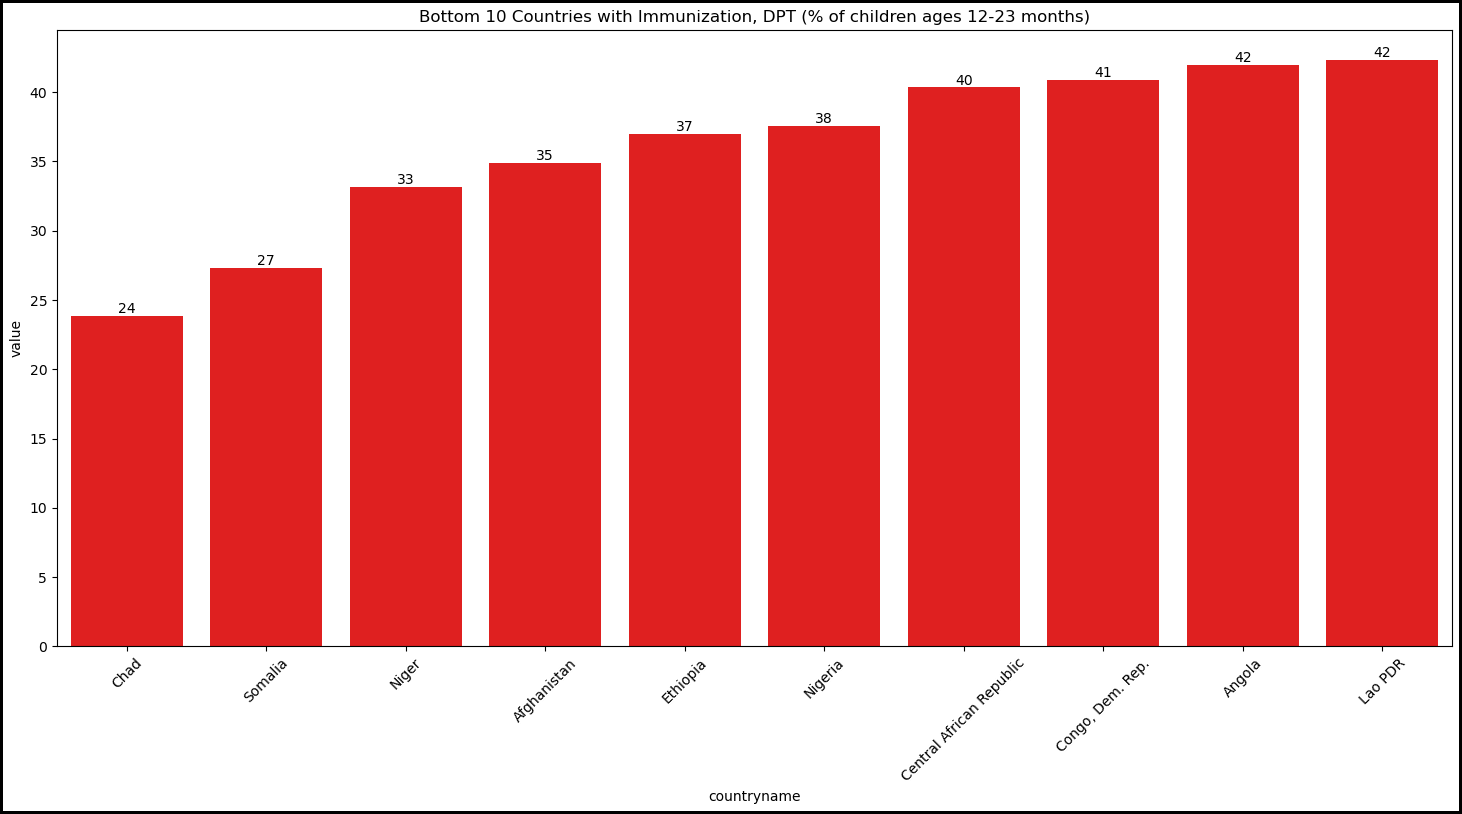

In [53]:
# Bottom 10 countries for Immunization

Immunization_DPT_Bottom_10 = country_indicators_series_df_final[country_indicators_series_df_final['indicatorcode']=='SH.IMM.IDPT'
].groupby('countryname')['value'].mean().reset_index().sort_values(by='value').head(10)

Immunization_DPT_Bottom_10.round(0)

plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)
plt.title("Bottom 10 Countries with Immunization, DPT (% of children ages 12-23 months)")
ax = sns.barplot(x='countryname', y="value", data=Immunization_DPT_Bottom_10, color='red', order=Immunization_DPT_Bottom_10.sort_values('value').countryname)
plt.xticks(rotation=45) 


for i in ax.containers:
    ax.bar_label(i, labels=[f'{x:,.0f}' for x in i.datavalues])

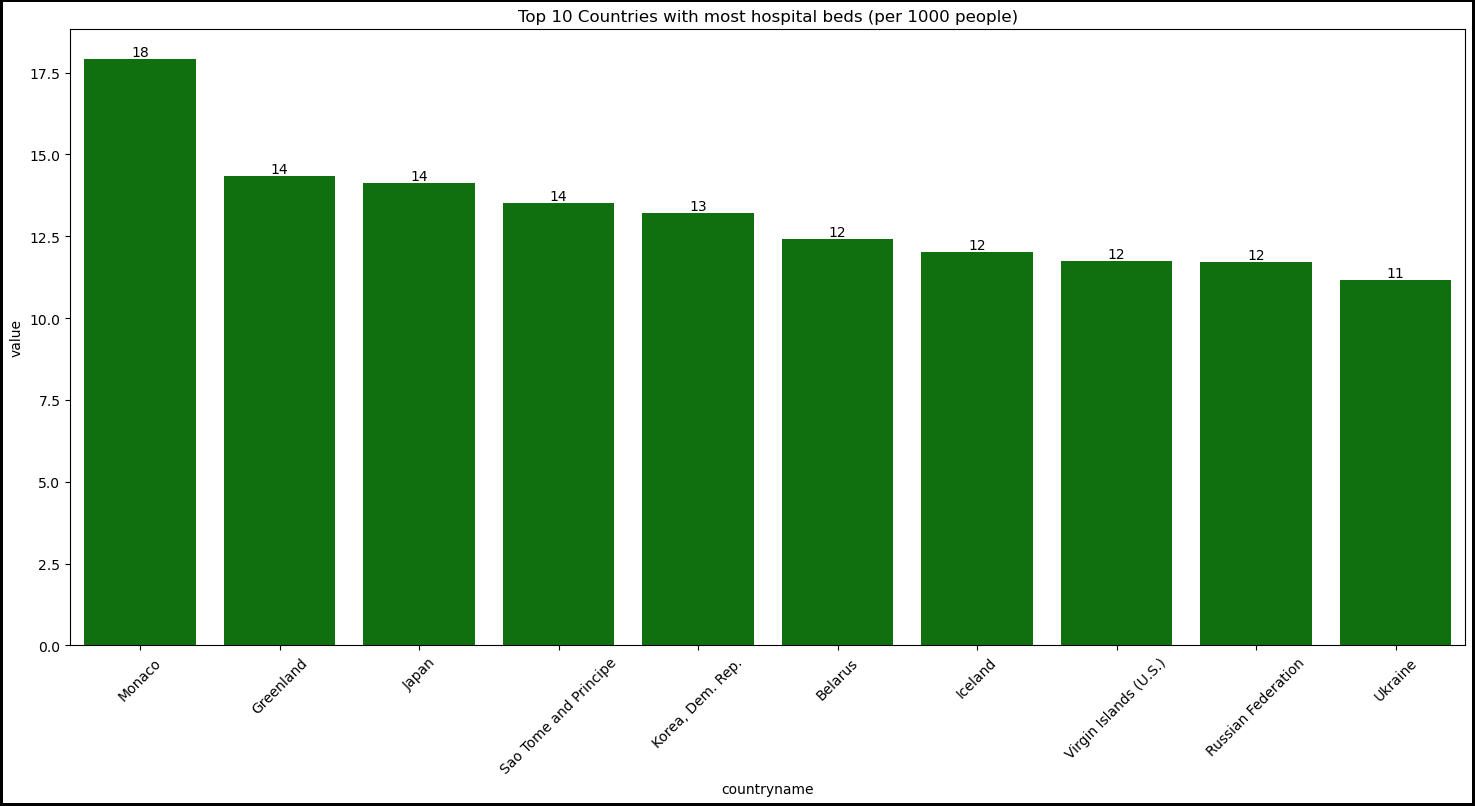

In [54]:
# Top 10 countries for Hospital beds (Hospital beds (per 1,000 people))

Hospital_beds_Top_10 = country_indicators_series_df_final[country_indicators_series_df_final['indicatorcode']=='SH.MED.BEDS.ZS'
].groupby('countryname')['value'].mean().reset_index().sort_values(by='value',ascending=False).head(10)

Hospital_beds_Top_10.round(0)

plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)
plt.title("Top 10 Countries with most hospital beds (per 1000 people)")
ax = sns.barplot(x='countryname', y="value", data=Hospital_beds_Top_10, color='green', order=Hospital_beds_Top_10.sort_values('value',ascending=False).countryname)
plt.xticks(rotation=45) 


for i in ax.containers:
    ax.bar_label(i, labels=[f'{x:,.0f}' for x in i.datavalues])

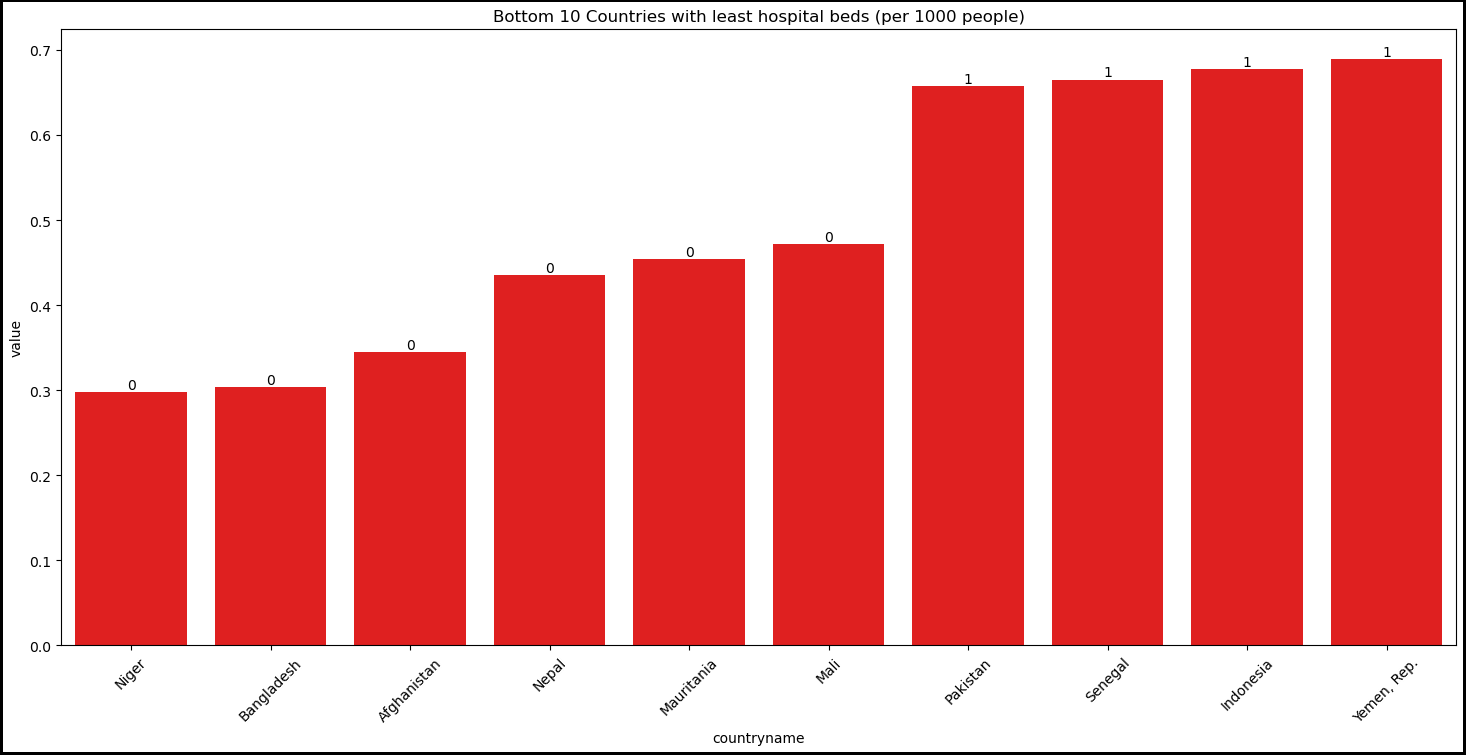

In [55]:
# Bottom 10 countries for Hospital beds

Hospital_beds_bottom_10 = country_indicators_series_df_final[country_indicators_series_df_final['indicatorcode']=='SH.MED.BEDS.ZS'
].groupby('countryname')['value'].mean().reset_index().sort_values(by='value').head(10)

Hospital_beds_bottom_10.round(0)

plt.figure(figsize=(18,8), edgecolor='black', linewidth=4)
plt.title("Bottom 10 Countries with least hospital beds (per 1000 people)")
ax = sns.barplot(x='countryname', y="value", data=Hospital_beds_bottom_10, color='red', order=Hospital_beds_bottom_10.sort_values('value').countryname)
plt.xticks(rotation=45) 


for i in ax.containers:
    ax.bar_label(i, labels=[f'{x:,.0f}' for x in i.datavalues])

Bokeh implementation and GDP Growth display. Bokeh plot enables interactivity with tools such as Pan, Zoom, hover and reset.

In [56]:
# Install Bokeh and and plot GDP Growth on 

%pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [59]:
# Create data frame with countries for GDP growth in 2012
GDP_Growth_2012 = country_indicators_series_df_final[(country_indicators_series_df_final['indicatorcode']=='NY.GDP.MKTP.KD.ZG') & (country_indicators_series_df_final['year']==2012) & country_indicators_series_df_final['countrycode'].isin(['USA','AUS','BRA','DNK','FRA','IDN','MYS','SGP'])]
GDP_Growth_2012_Countries = GDP_Growth_2012[['countryname', 'value']]
# Converting value column to float (to reduce decimal places) needed to accommodate in Bokeh plot
GDP_Growth_2012_Countries['value'] = GDP_Growth_2012_Countries['value'].astype(float)
GDP_Growth_2012_Countries

,countryname,value
966364,Australia,3.632720
967019,Brazil,1.762489
968073,Denmark,-0.655226
968661,France,0.182693
969510,Indonesia,6.030051
970859,Malaysia,5.473454
972848,Singapore,3.414361
974179,United States,2.321084


In [61]:
# Import bokeh libraries and plot the GDP growth of countries in 2012
from bokeh.models.tools import HoverTool, BoxZoomTool # type: ignore
from bokeh.plotting import figure, show # type: ignore
from bokeh.palettes import Spectral8 # type: ignore
from bokeh.transform import factor_cmap # type: ignore
import bokeh.io # type: ignore
bokeh.io.output_notebook()

countries = GDP_Growth_2012_Countries['countryname'].tolist()
p = figure(x_range=countries)

color_map = factor_cmap(field_name='countryname',
                    palette=Spectral8, factors=countries)

p.vbar(x='countryname', top='value', source=GDP_Growth_2012_Countries, width=0.70, color=color_map)
p.title.text ='GDP Growth in 2012'
p.xaxis.axis_label = 'Country'
p.yaxis.axis_label = 'GDP Growth'

box_zoom = BoxZoomTool() 
hover = HoverTool()
p.add_tools(hover)
p.add_tools(box_zoom)

hover.tooltips=[
    ('Country', '@countryname'),
    ('GDP Growth', '@value')
]

bokeh.io.show(p)


Loading BokehJS ...